In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# load in details data

details = pd.read_csv('Storm_Details_2017.csv')
print(details.shape)
details.head()

(42528, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201704,6,1509,201704,6,1509,113355,678791,NEW JERSEY,34,...,1.0,NW,FRIES MILLS,39.6600,-75.0800,39.6600,-75.0800,Low pressure tracked from the Ohio Valley into...,A couple of trees were taken down due to thund...,CSV
1,201704,5,1555,201704,5,1555,113397,679188,ALABAMA,1,...,2.0,E,HUNTSVILLE,34.7300,-86.5900,34.7300,-86.5900,Isolated supercells developed during the mid a...,Quarter sized hail was reported in the Huntsvi...,CSV
2,201704,6,930,201704,6,940,113459,679228,FLORIDA,12,...,1.0,SW,FORT MYERS VILLAS,26.5010,-81.9980,26.5339,-81.8836,A line of thunderstorms developed along a pref...,Emergency management reported and broadcast me...,CSV
3,201704,5,1749,201704,5,1753,113448,679268,OHIO,39,...,3.0,NE,FAIRBORN,39.8500,-83.9900,39.8500,-83.9900,Showers and thunderstorms developed ahead of a...,An entire tree was uprooted in a yard on Dayto...,CSV
4,201704,16,1759,201704,16,1900,113697,682042,OHIO,39,...,1.0,NW,SUMMERSIDE,39.1065,-84.2875,39.1061,-84.2874,Thunderstorms with very heavy rain developed a...,Garage of a home was flooded by high water.,CSV


In [3]:
# load in locations dat

locations = pd.read_csv('Storm_Location_2017.csv')
print(locations.shape)
locations.head()

(40621, 11)


,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201703,112682,673239,1,0.86,SSW,ELKINS,38.9087,-79.8569,3854522,7951414
1,201703,112682,673240,1,0.00,N,(EKN)RANDOLPH FLD EL,38.8800,-79.8500,3852800,7951000
2,201703,112682,673241,1,14.77,WSW,PEELTREE,39.0417,-80.4707,392502,8028242
3,201703,112682,673699,1,2.00,S,GLENVILLE,38.9011,-80.8300,3854066,8049800
4,201703,112681,673155,1,0.60,NNW,LANGSVILLE,39.0577,-82.1854,393462,8211124


In [4]:
# merge data

data = pd.merge(details, locations, how='inner', on=['EPISODE_ID', 'EVENT_ID'])
print(data.shape)
data.head()

(40621, 60)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,DATA_SOURCE,YEARMONTH,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201704,6,1509,201704,6,1509,113355,678791,NEW JERSEY,34,...,CSV,201704,1,0.87,NW,FRIES MILLS,39.6600,-75.0800,3939600,754800
1,201704,5,1555,201704,5,1555,113397,679188,ALABAMA,1,...,CSV,201704,1,1.70,E,HUNTSVILLE,34.7300,-86.5900,3443800,8635400
2,201704,6,930,201704,6,940,113459,679228,FLORIDA,12,...,CSV,201704,1,0.63,S,PUNTA RASSA,26.5010,-81.9980,2630060,8159880
3,201704,6,930,201704,6,940,113459,679228,FLORIDA,12,...,CSV,201704,2,1.39,SW,FORT MYERS VILLAS,26.5339,-81.8836,2632034,8153016
4,201704,5,1749,201704,5,1753,113448,679268,OHIO,39,...,CSV,201704,1,2.61,NE,FAIRBORN,39.8500,-83.9900,3951000,8359400


In [5]:
# drop null rows and check if any null values remaining

storm_types = list(set(data['EVENT_TYPE'].values))
print(storm_types)

data.dropna(inplace=True, subset = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS','BEGIN_YEARMONTH', 'BEGIN_DAY','STATE_FIPS', 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE'])      
print(data.shape)

# deleted 7000 rows

['Flood', 'Lightning', 'Hail', 'Funnel Cloud', 'Debris Flow', 'Dust Devil', 'Waterspout', 'Heavy Rain', 'Flash Flood', 'Tornado', 'Marine Hail', 'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Thunderstorm Wind', 'Marine High Wind']
(15091, 60)


In [6]:
cols = list(data.columns.values)
print(cols)
print()
data['DAMAGE_PROPERTY'].head()

storm_types = list(set(data['EVENT_TYPE'].values))
print(storm_types)


['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2']

['Hail', 'Marine Hail', 'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Thunderstorm Wind', 'Marine High Wind']


In [7]:

print(data['DAMAGE_PROPERTY'][data['DAMAGE_PROPERTY'].isnull()].size)

damage_property = []
for i in data["DAMAGE_PROPERTY"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_property.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_property.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_property.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_property.append(dam)
                except:
                    print(i)
                    
damage_crops = []
for i in data["DAMAGE_CROPS"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_crops.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_crops.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_crops.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_crops.append(dam)
                except:
                    print(i)
                    
data["DAMAGE_PROPERTY"] = damage_property
data["DAMAGE_CROPS"] = damage_crops

print(data['DAMAGE_PROPERTY'][data['DAMAGE_PROPERTY'].isnull()].size)
        
data['DAMAGE_TOTAL'] = data['DAMAGE_PROPERTY'] + data['DAMAGE_CROPS']


0
0


In [8]:
has_damage = []
for x in data['DAMAGE_TOTAL']:
    if x > 0.0:
        has_damage.append(1)
    else:
        has_damage.append(0)

data['HAS_DAMAGE'] = has_damage
data['HAS_DAMAGE'].head()

4     1
9     0
10    1
16    1
22    0
Name: HAS_DAMAGE, dtype: int64

In [9]:
data.to_csv("full_data.csv")

In [10]:

#train_cols = cols.remove([['BEGIN_YEARMONTH', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'AZIMUTH', 'LOCATION', 'LAT2', 'LON2']])
train_cols = ['BEGIN_DAY', 'YEAR','CZ_FIPS','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE', 'STATE', 'EVENT_TYPE', 'CZ_TYPE', 'MONTH_NAME', 'CZ_TIMEZONE']
#train_cols = ['EVENT_TYPE']

X = data[train_cols]
y = data['HAS_DAMAGE']

X = pd.get_dummies(X, columns=['STATE','EVENT_TYPE','CZ_TYPE', 'MONTH_NAME', 'CZ_TIMEZONE'], drop_first=True)
#X = pd.get_dummies(X, columns=['EVENT_TYPE'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# fit prelim model

print(len(data[data['HAS_DAMAGE'] == 0]))
print(len(data[data['HAS_DAMAGE'] == 1]))

#print(X_train[X_train.isnull().any(axis=1)].size)
#print(y_train[y_train.isnull()].size)
#print(X_test[X_test.isnull().any(axis=1)].size)
#print(y_test[y_test.isnull()].size)

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print()
print(accuracy_score(train_pred, y_train))
print(accuracy_score(test_pred, y_test))

print(len(train_pred[train_pred == 1]) + len(test_pred[test_pred == 1]))
print(len(train_pred[train_pred == 0]) + len(test_pred[test_pred == 0]))


10034
5057

0.796834817013
0.805059225055
4054
11037


In [12]:
# EDA, out of storms with damage, where are they occuring

damage_data = data[data['HAS_DAMAGE'] == 1]

35
35


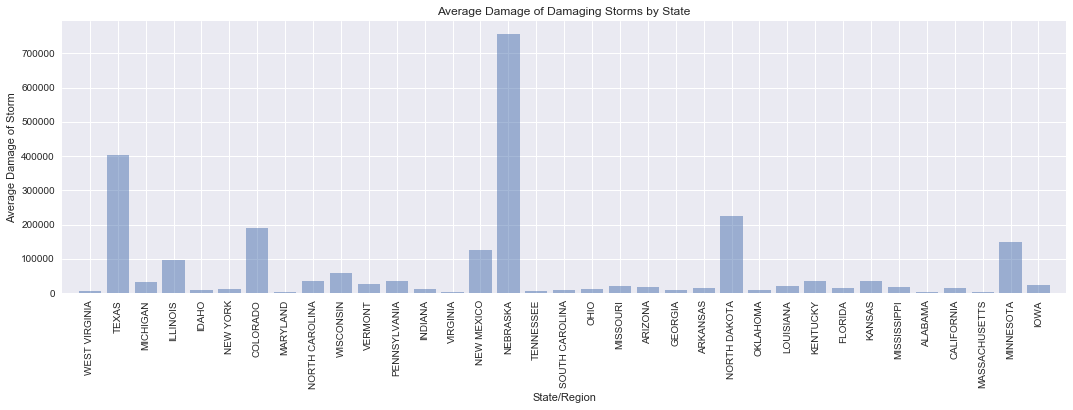

In [13]:
# display average damage per state (keep in mind, smallish sample)

sns.set(color_codes=True)

states = list(set(damage_data['STATE'].values))

states_final = []
ave_per_state = []
for i in range(len(states)):
    state = states[i]
    state_damage = damage_data[damage_data['STATE'] == state]['DAMAGE_TOTAL']
    if len(state_damage) > 10:
        ave = np.mean(state_damage)
        states_final.append(state)
        ave_per_state.append(ave)

print(len(states_final))
print(len(ave_per_state))

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(35), ave_per_state, align='center', alpha=0.5)
ax.set_xlim([-1, 35])
ax.set_xticks(range(35))
ax.set_xticklabels(states_final, rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by State')

plt.show()

['Hail', 'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Thunderstorm Wind']
4
4


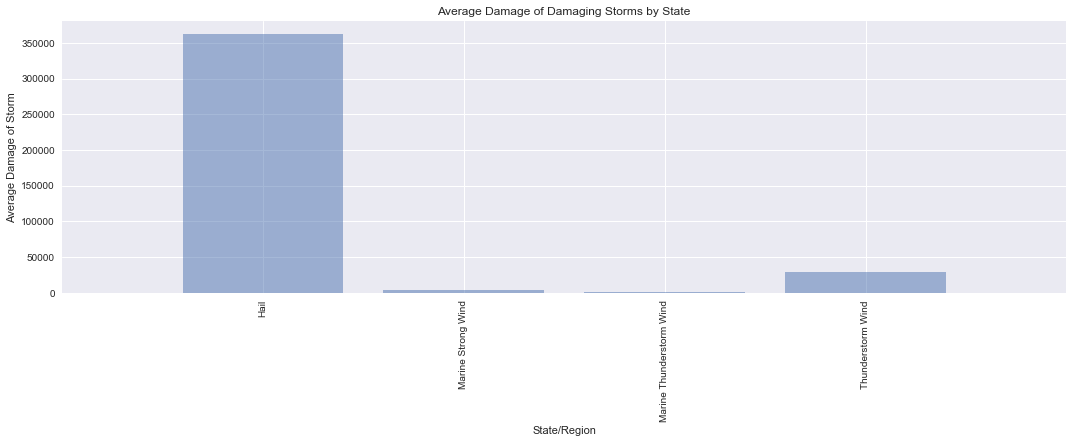

In [14]:
# display average damage per state (keep in mind, smallish sample)

sns.set(color_codes=True)

storm_types = list(set(damage_data['EVENT_TYPE'].values))
print(storm_types)

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = damage_data[damage_data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

print(len(storm_types))
print(len(ave_per_storm))

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

['Hail', 'Marine Hail', 'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Thunderstorm Wind', 'Marine High Wind']
6
6


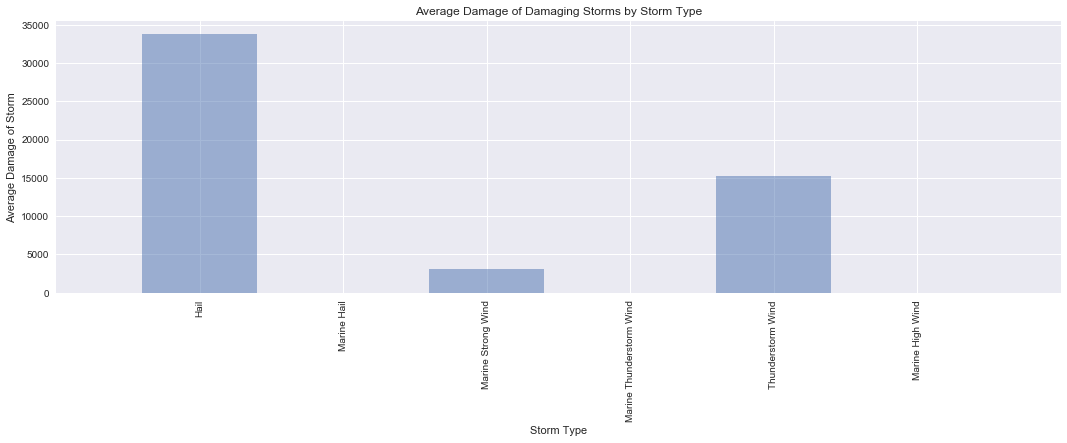

In [15]:
# display average damage per state (keep in mind, smallish sample)

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))
print(storm_types)

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_TOTAL']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

print(len(storm_types))
print(len(ave_per_storm))

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()